## Task 1 - Student Performance Factors

### 1. Important Libraries

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

### 2. Read Data and Show Info.

In [2]:
df = pd.read_csv(r".\StudentPerformanceFactors.csv")

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### 3. Analysis Dataset

#### 3.1 Info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

##### 🎓 Student Performance Dataset — Feature Overview

| 🏷️ **Feature**               | 📝 **Description**                                                                                  |
|------------------------------|------------------------------------------------------------------------------------------------------|
| `Hours_Studied`              | Number of hours spent studying per week.                                                            |
| `Attendance`                 | Percentage of classes attended.                                                                     |
| `Parental_Involvement`       | Level of parental involvement in the student's education (`Low`, `Medium`, `High`).                |
| `Access_to_Resources`        | Availability of educational resources (`Low`, `Medium`, `High`).                                   |
| `Extracurricular_Activities` | Participation in extracurricular activities (`Yes`, `No`).                                          |
| `Sleep_Hours`                | Average number of hours of sleep per night.                                                         |
| `Previous_Scores`            | Scores from previous exams.                                                                         |
| `Motivation_Level`           | Student's motivation level (`Low`, `Medium`, `High`).                                               |
| `Internet_Access`            | Availability of internet access (`Yes`, `No`).                                                      |
| `Tutoring_Sessions`          | Number of tutoring sessions attended per month.                                                     |
| `Family_Income`              | Family income level (`Low`, `Medium`, `High`).                                                      |
| `Teacher_Quality`            | Quality of the teachers (`Low`, `Medium`, `High`).                                                  |
| `School_Type`                | Type of school attended (`Public`, `Private`).                                                      |
| `Peer_Influence`             | Influence of peers on academic performance (`Positive`, `Neutral`, `Negative`).                     |
| `Physical_Activity`          | Average number of hours of physical activity per week.                                              |
| `Learning_Disabilities`      | Presence of learning disabilities (`Yes`, `No`).                                                    |
| `Parental_Education_Level`   | Highest education level of parents (`High School`, `College`, `Postgraduate`).                      |
| `Distance_from_Home`         | Distance from home to school (`Near`, `Moderate`, `Far`).                                           |
| `Gender`                     | Gender of the student (`Male`, `Female`).                                                           |
| `Exam_Score`                 | 🎯 **Final exam score** — *Target variable for prediction.*                                          |

#### 3.2 Describe

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


#### 3.3 Target

In [6]:
df['Exam_Score']

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6607, dtype: int64

#### 3.4 Visualization

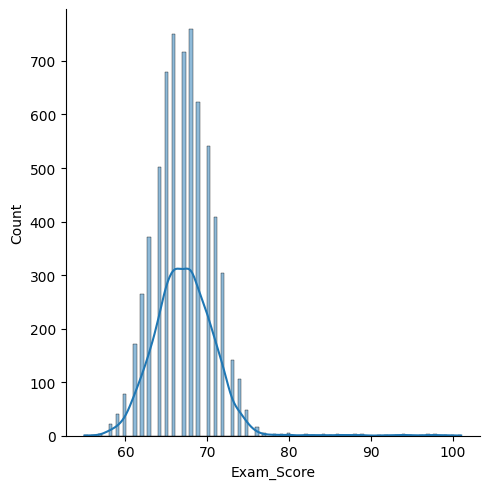

In [7]:
sns.displot(df['Exam_Score'], kind='hist', kde=True) 

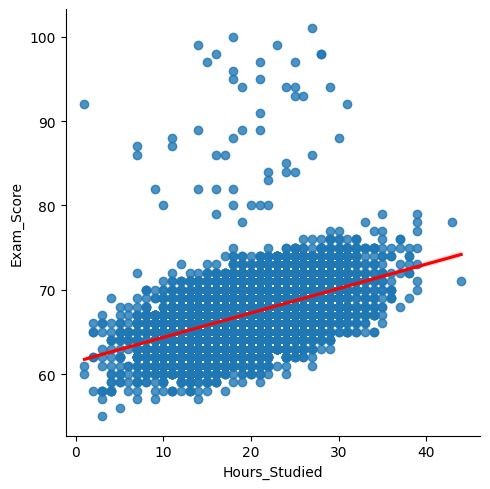

In [8]:
sns.lmplot(data=df, x='Hours_Studied', y='Exam_Score', line_kws={"color": "red"})

<Axes: xlabel='Gender', ylabel='count'>

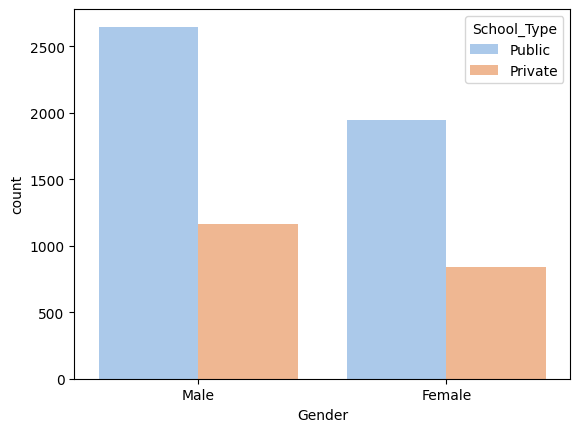

In [9]:
sns.countplot(data=df, x='Gender', hue='School_Type', palette='pastel')

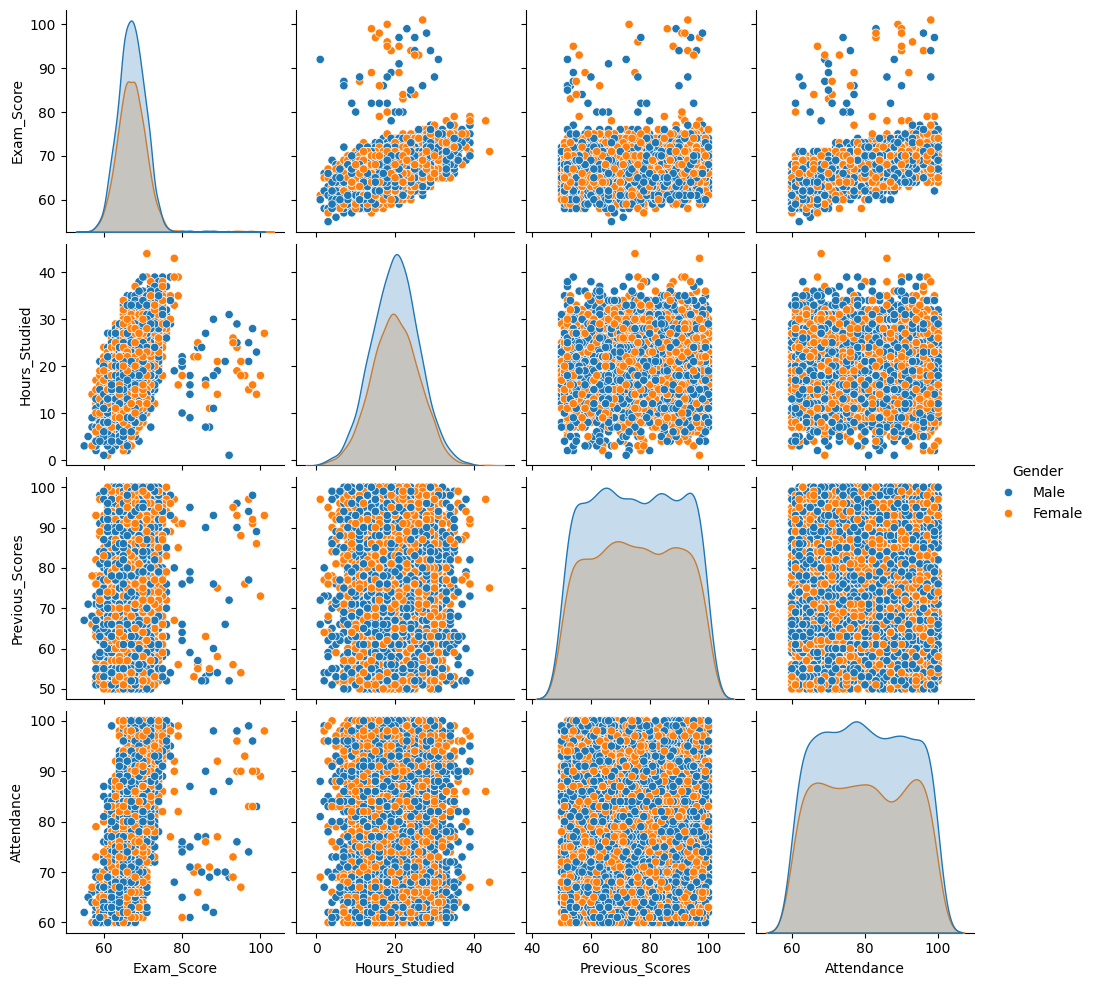

In [10]:
sns.pairplot(df, vars=['Exam_Score', 'Hours_Studied', 'Previous_Scores', 'Attendance'], hue='Gender')

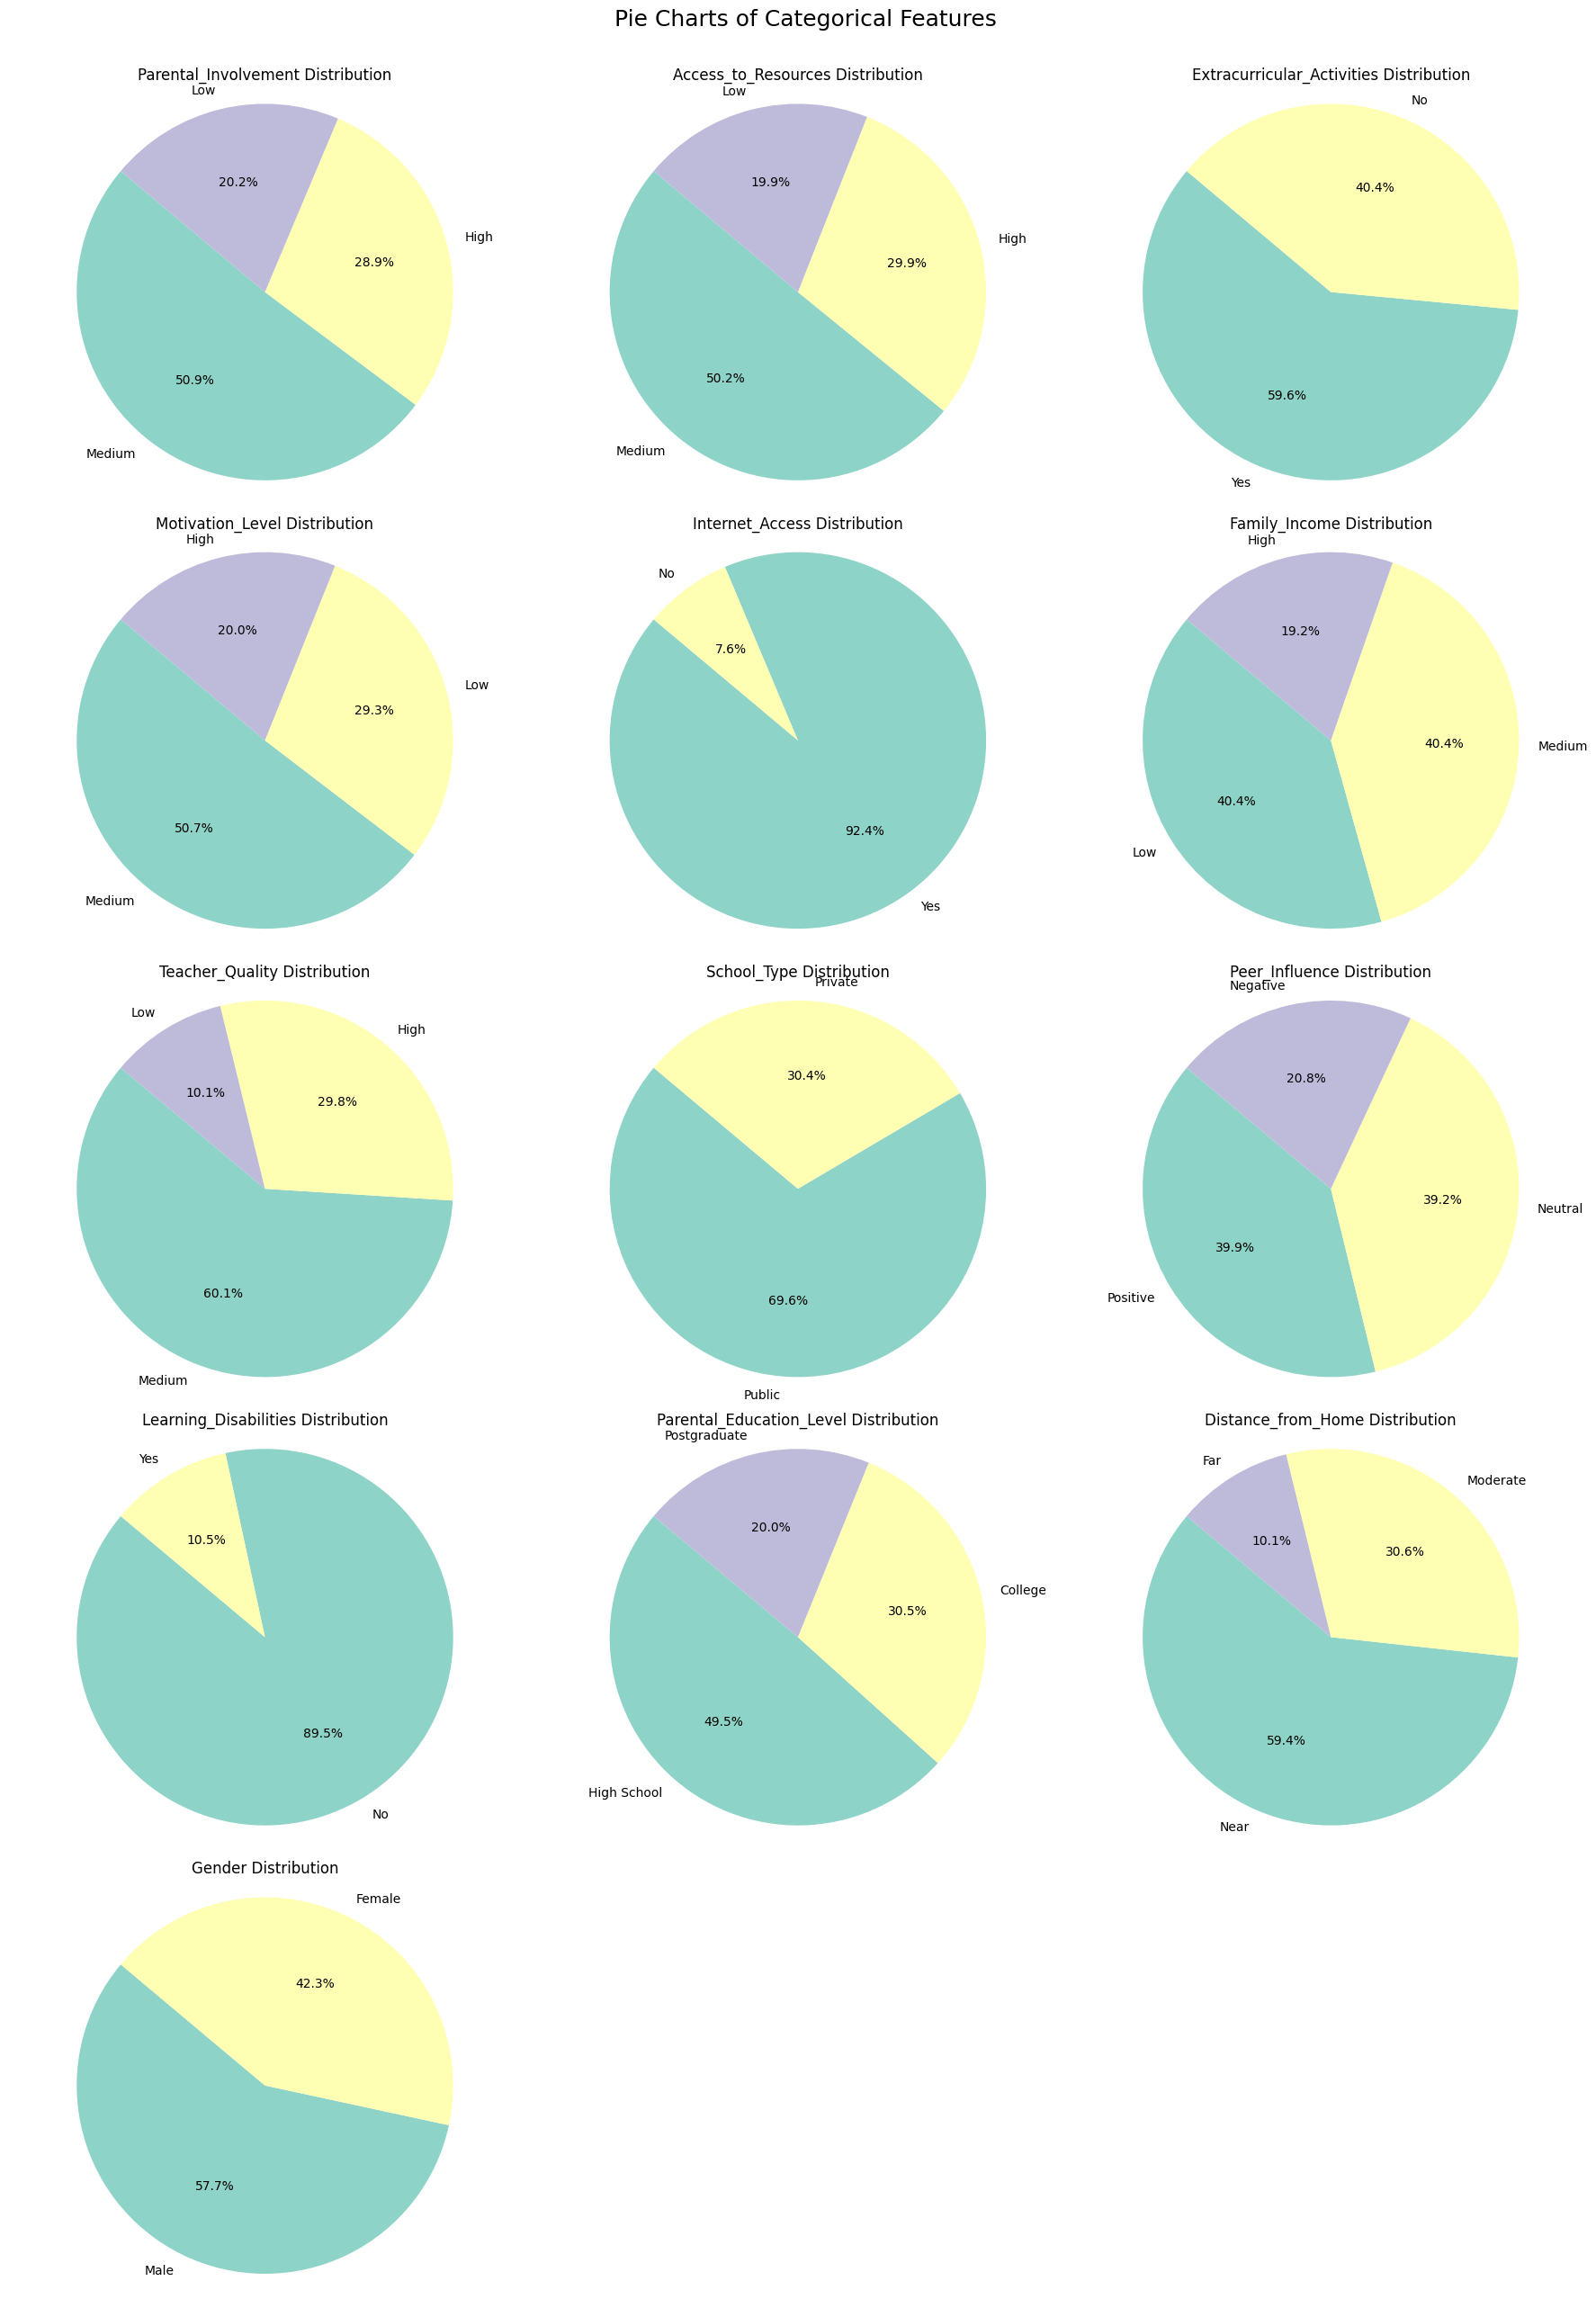

In [11]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

n = len(categorical_cols)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(6 * cols, 5 * rows))

for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)
    value_counts = df[col].value_counts()
    
    plt.pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("Set3")
    )
    plt.title(f'{col} Distribution')
    plt.axis('equal')

plt.tight_layout()
plt.suptitle("Pie Charts of Categorical Features", fontsize=18, y=1.02)
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_19052\2774165864.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_19052\2774165864.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_19052\2774165864.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
C:\Users\moham\AppData

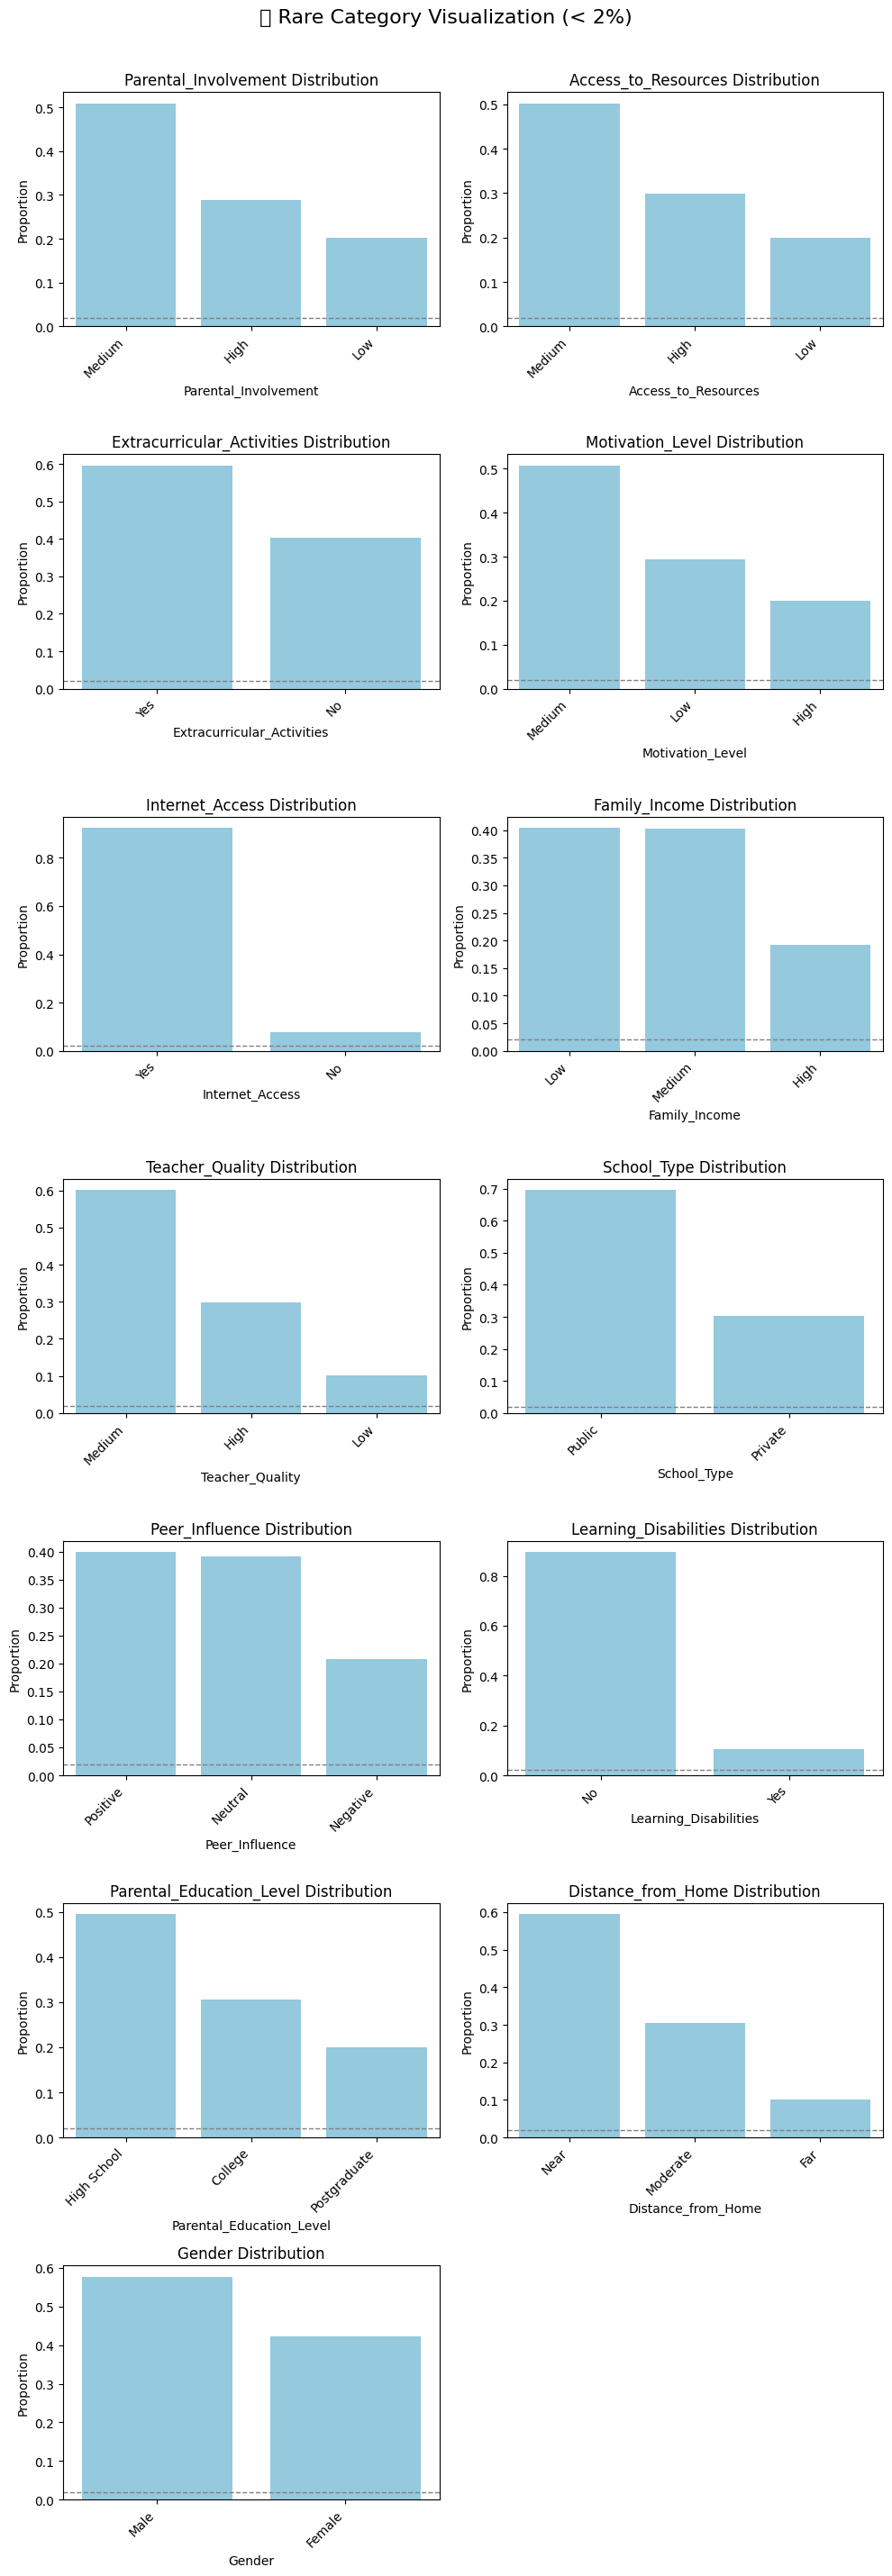

In [12]:
rare_threshold = 0.02

categorical_cols = df.select_dtypes(include='object').columns.tolist()

n = len(categorical_cols)
cols = 2
rows = (n + cols - 1) // cols

plt.figure(figsize=(10, 4 * rows))

for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)
    
    value_counts = df[col].value_counts(normalize=True)
    colors = ['red' if pct < rare_threshold else 'skyblue' for pct in value_counts]

    sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
    plt.title(f"{col} Distribution", fontsize=12)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45, ha='right')
    
    plt.axhline(rare_threshold, color='gray', linestyle='--', linewidth=1)
    plt.tight_layout()

plt.suptitle("🔍 Rare Category Visualization (< 2%)", fontsize=16, y=1.02)
plt.show()

### 4. Data Preprocessing 

#### 4.1 Correlation

In [13]:
df_copy = df.copy()

label = LabelEncoder()
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = label.fit_transform(df_copy[col])
        
correlation_matrix = df_copy.corr()

C:\Users\moham\AppData\Local\Temp\ipykernel_19052\104416857.py:6: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


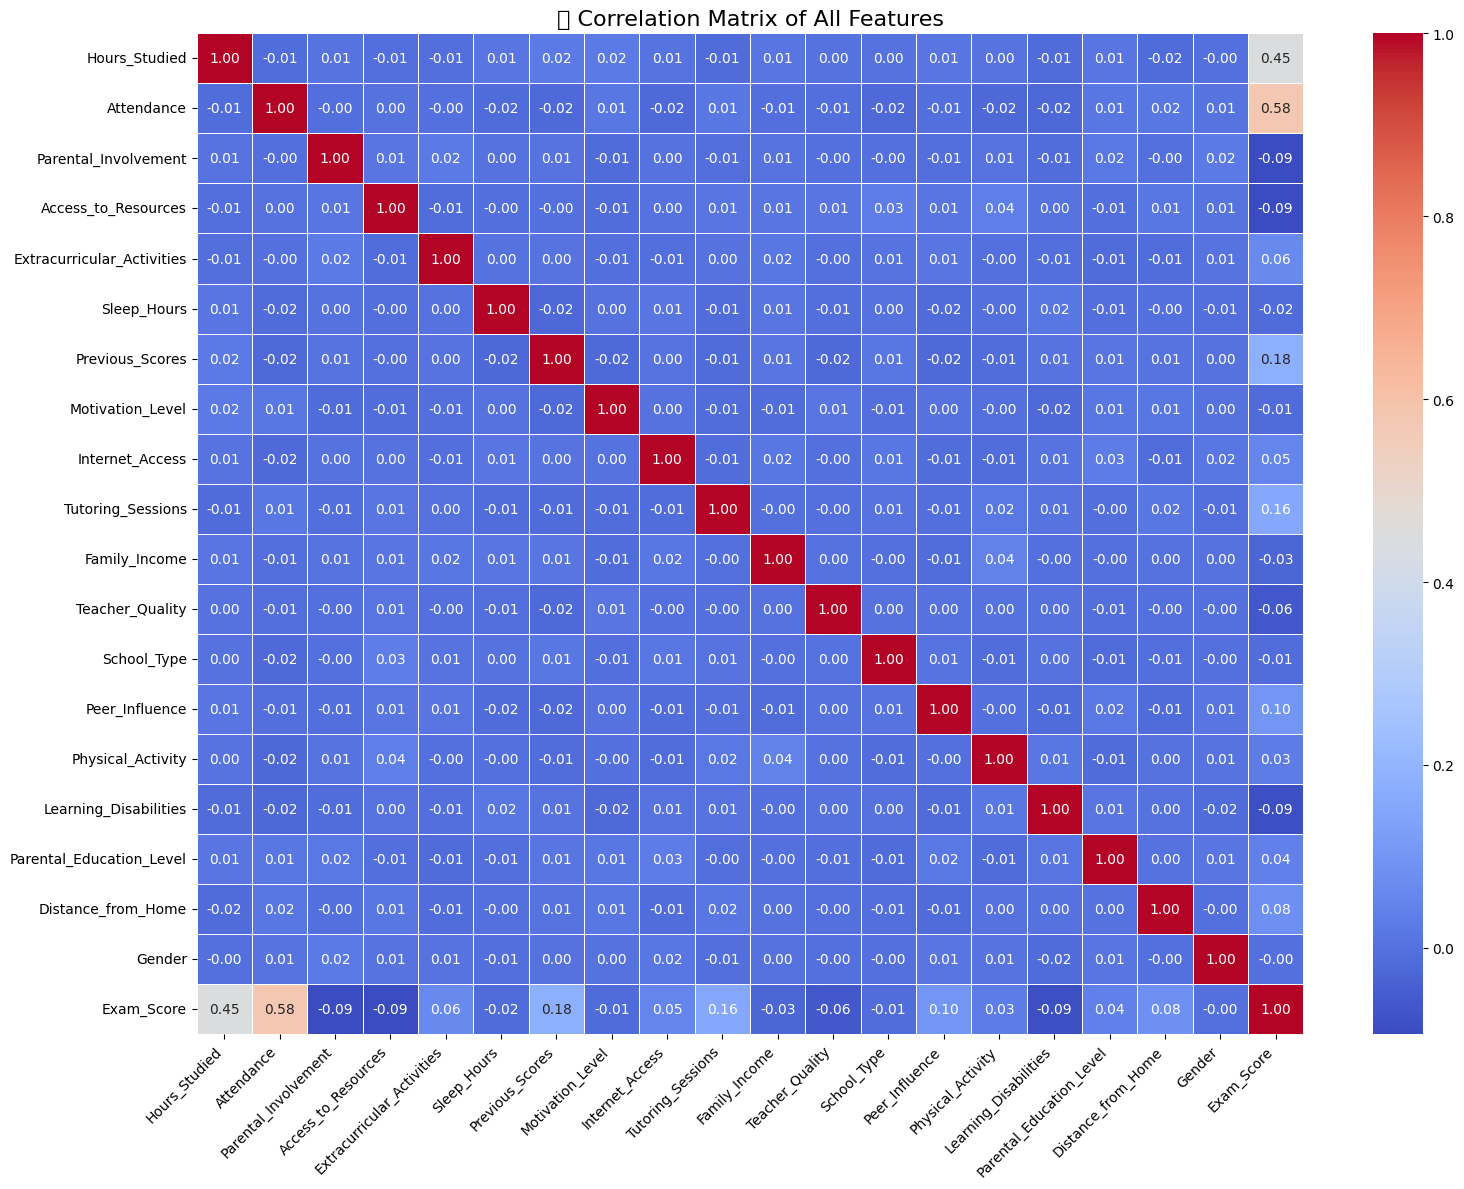

In [14]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('🔍 Correlation Matrix of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 4.2 Check Missing Values 

In [15]:
df.replace(['NaN', 'nan', 'None', ''], pd.NA, inplace=True)

In [16]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [17]:
df.loc[df['Exam_Score'] > 100, 'Exam_Score'] = 100

In [18]:
col = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

for i in col :
    print(df[i].mode()[0])
    df[i].fillna(df[i].mode()[0] , inplace=True)
    

Medium
High School
Near


C:\Users\moham\AppData\Local\Temp\ipykernel_19052\2437736172.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0] , inplace=True)


In [19]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

#### 4.3 Check Duplication

In [20]:
df.duplicated().sum()

np.int64(0)

#### 4.4 Check Outliers

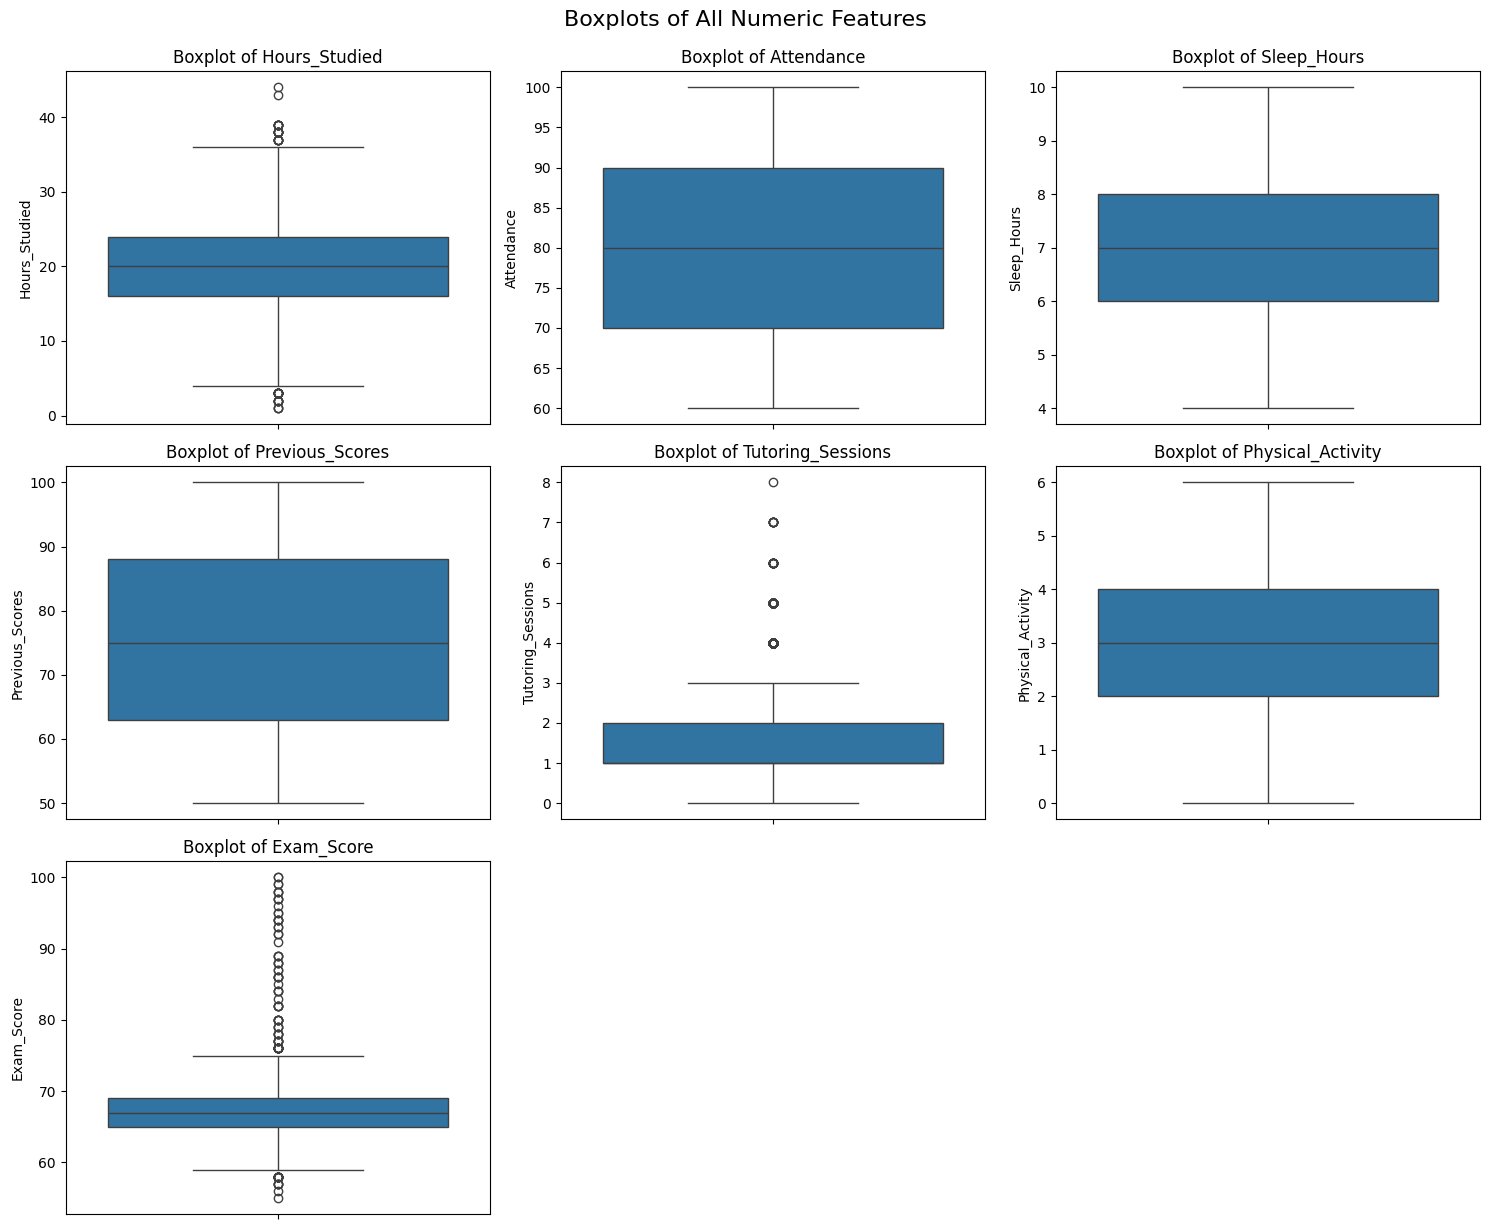

In [21]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n = len(numeric_cols)
cols = 3  
rows = (n + cols - 1) // cols  
plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])  
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle("Boxplots of All Numeric Features", fontsize=16, y=1.02)
plt.show()

In [22]:
# Columns identified for outlier removal
columns_to_clean = ['Hours_Studied', 'Tutoring_Sessions']

# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to keep only rows where the column value is within the bounds
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return df_cleaned

# Apply the outlier removal function to each specified column
for col in columns_to_clean:
    initial_rows = df.shape[0]
    df = remove_outliers_iqr(df, col)
    rows_removed = initial_rows - df.shape[0]
    print(f"Cleaned column '{col}'. Removed {rows_removed} rows. New shape: {df.shape}")

Cleaned column 'Hours_Studied'. Removed 43 rows. New shape: (6564, 20)
Cleaned column 'Tutoring_Sessions'. Removed 430 rows. New shape: (6134, 20)


#### 4.5 Handle Categorical Features

In [23]:
cat_col = ['Parental_Involvement','Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
       'Internet_Access','Family_Income','Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender']

for column in cat_col: 
    df[column] = label.fit_transform(df[column])

In [24]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


### 5. Split Data into Features and Target

In [25]:
X = df.drop(columns='Exam_Score')
y = df['Exam_Score']

In [26]:
X.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0


In [27]:
y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

### 6. Split Data into Train and Test Sets

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 ,random_state=42)

In [29]:
X_train.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
4261,18,67,0,0,1,7,68,2,1,0,2,2,1,2,4,0,1,2,1
1440,24,76,2,2,0,9,92,2,1,1,2,1,1,1,3,0,2,2,0
1715,19,69,2,2,1,7,84,2,1,2,2,2,1,1,4,0,1,2,1
2557,20,97,2,0,1,5,63,2,1,0,1,2,1,0,3,0,0,0,0
1128,20,81,0,0,1,7,56,1,0,1,2,2,0,2,3,0,1,2,1


In [30]:
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (4907, 19)
y_train shape =  (4907,)
X_test shape =  (1227, 19)
y_test shape =  (1227,)


### 7. Modeling

#### 7.1 Scalling Data 

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train

array([[-0.34385614, -1.11871082, -1.41757274, ...,  0.14260443,
         0.74889229,  0.85812383],
       [ 0.68666223, -0.33644399,  0.89493704, ...,  1.57360632,
         0.74889229, -1.16533298],
       [-0.17210308, -0.94487375,  0.89493704, ...,  0.14260443,
         0.74889229,  0.85812383],
       ...,
       [ 0.51490917,  0.96733405,  0.89493704, ...,  0.14260443,
         0.74889229,  0.85812383],
       [-0.34385614,  0.01123015, -0.26131785, ..., -1.28839746,
         0.74889229, -1.16533298],
       [-0.68736226, -0.42336253, -1.41757274, ...,  0.14260443,
        -0.74432773, -1.16533298]])

#### 7.2 Linear Regression

In [33]:
linear_model = LinearRegression()

In [34]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred_linear = linear_model.predict(X_test)

In [36]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Mean Absolute Error: {mae_linear}')
print(f'Mean Squared Error: {mse_linear}')
print(f'R² Score: {r2_linear}')

Mean Absolute Error: 1.0569431748387088
Mean Squared Error: 4.502309721587894
R² Score: 0.6695413208117086


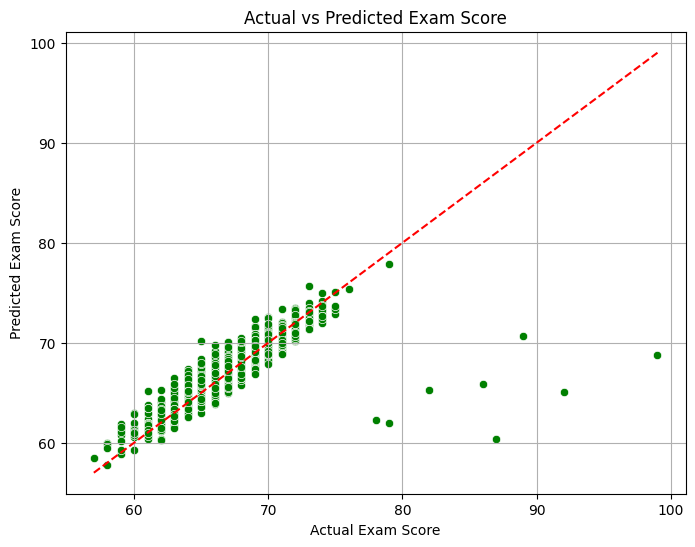

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_linear, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Score')
plt.grid(True)
plt.show()

#### 7.3 Polynomial Regression

##### 7.3.1 Choose Best Degree

In [38]:
best_r2 = -float('inf')
best_degree = None
results = []

for degree in range(1, 6):  # Try degrees from 1 to 5
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        'Degree': degree,
        'R² Score': r2,
        'MSE': mse
    })

    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree

print(f"\n✅ Best degree is: {best_degree} with R² Score = {best_r2:.4f}")


✅ Best degree is: 2 with R² Score = 0.7439


##### 7.3.2 Work with Best Degree

In [39]:
Degree = best_degree
poly_regs = PolynomialFeatures(degree=Degree)

In [40]:
X_train = poly_regs.fit_transform(X_train) 
X_test= poly_regs.transform(X_test) 

In [41]:
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

In [42]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred_poly = poly_model.predict(X_test)

In [44]:
mae_poly = mean_absolute_error(y_test, y_pred_poly )
mse_poly = mean_squared_error(y_test, y_pred_poly )
r2_poly = r2_score(y_test, y_pred_poly )

print(f'Mean Absolute Error: {mae_poly}')
print(f'Mean Squared Error: {mse_poly}')
print(f'R² Score: {r2_poly}')

Mean Absolute Error: 0.570282652925472
Mean Squared Error: 3.4894200075326602
R² Score: 0.7438849839020498


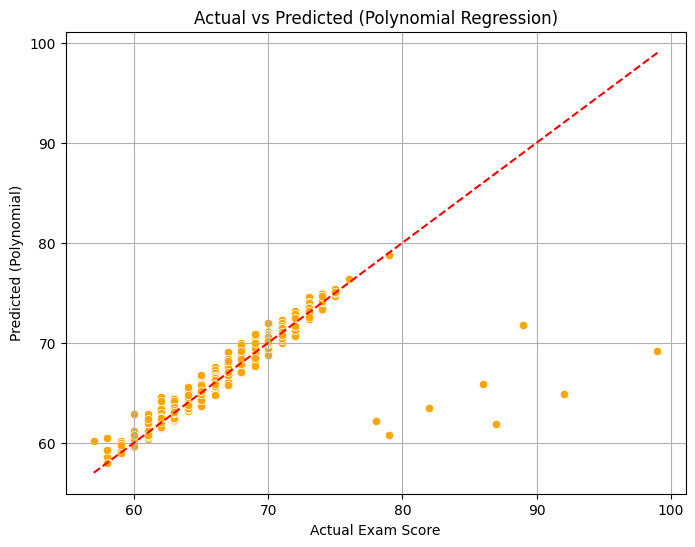

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_poly, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted (Polynomial)')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.grid(True)
plt.show()

### 8. Compare performance

In [46]:
print("📊 Model Performance Comparison:\n")
print(f"Linear Regression:\n  MAE = {mae_linear:.4f} \n  MSE = {mse_linear:.4f} \n  R²  = {r2_linear:.4f}")
print(f"\nPolynomial Regression (degree={best_degree}):\n  MAE = {mae_poly:.4f} \n  MSE = {mse_poly:.4f} \n  R²  = {r2_poly:.4f}")

📊 Model Performance Comparison:

Linear Regression:
  MAE = 1.0569 
  MSE = 4.5023 
  R²  = 0.6695

Polynomial Regression (degree=2):
  MAE = 0.5703 
  MSE = 3.4894 
  R²  = 0.7439


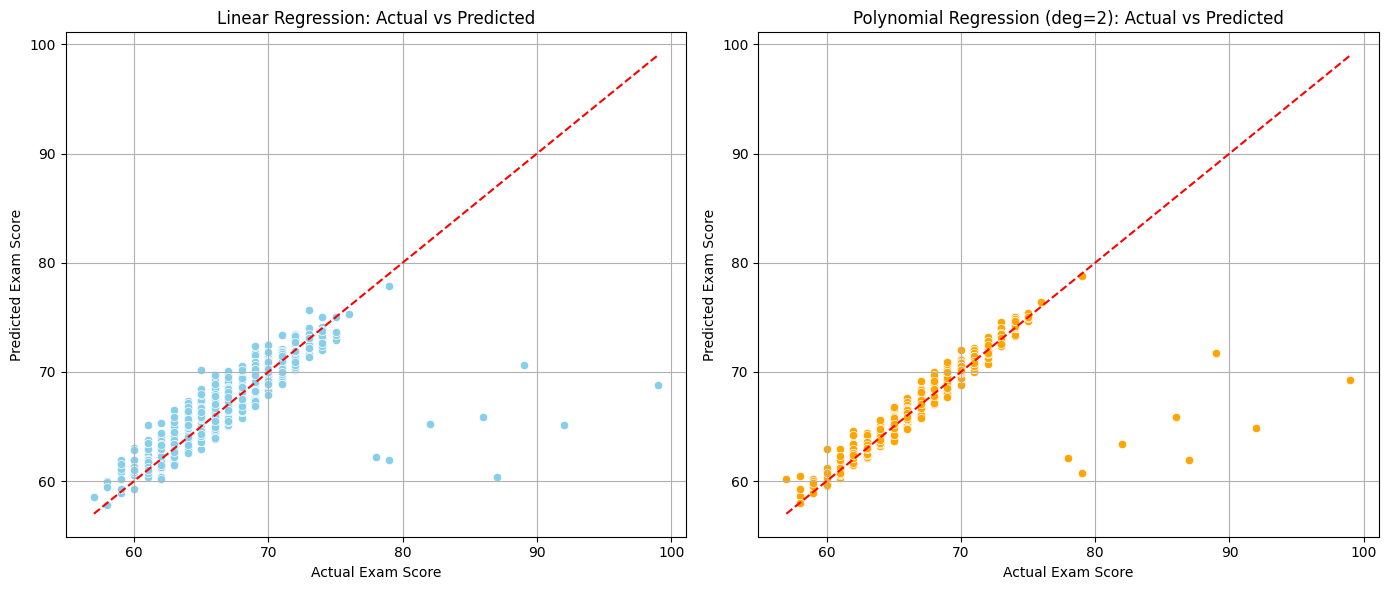

In [47]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_poly, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title(f'Polynomial Regression (deg={best_degree}): Actual vs Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()